In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = "./img1.jpg"
image = cv2.imread(path, 0)
image.shape

(768, 1024)

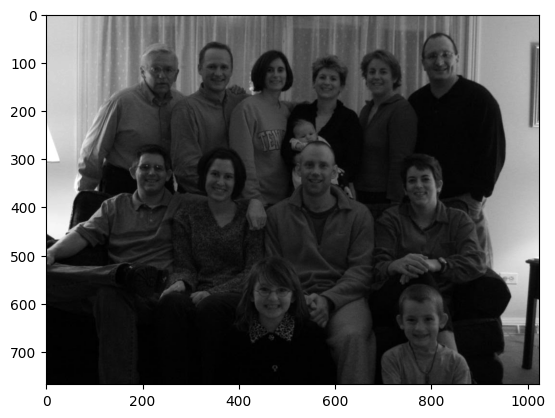

In [6]:
plt.imshow(image, cmap="gray")

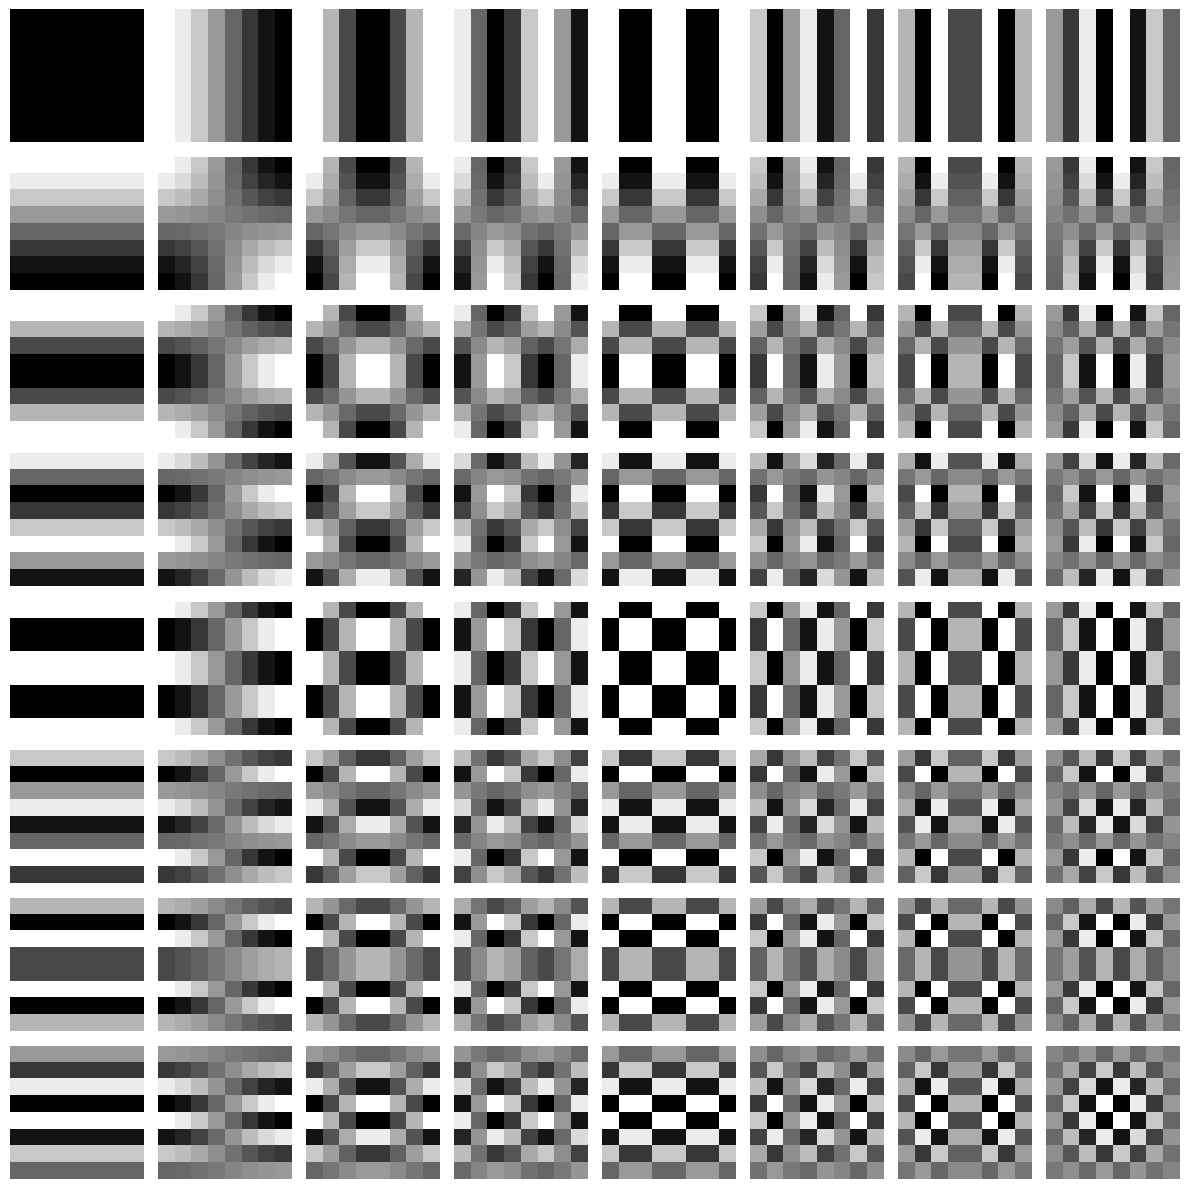

In [16]:
def generate_dct_basis(N):
    basis_images = []
    for u in range(N):
        for v in range(N):
            basis = np.zeros((N, N), dtype=np.float32)
            basis[u, v] = 1.0
            basis_idct = cv2.idct(basis)
            basis_images.append(basis_idct)
    return basis_images



def plot_dct_basis(basis_images, N):
    fig, axes = plt.subplots(N, N, figsize=(12, 12))
    for i in range(N):
        for j in range(N):
            ax = axes[i, j]
            basis = basis_images[i * N + j]
            ax.imshow(basis, cmap='gray', extent=[0, N, 0, N])
            ax.axis('off')
    plt.tight_layout()
    plt.show()



N = 8
dct_basis_images = generate_dct_basis(N)
plot_dct_basis(dct_basis_images, N)



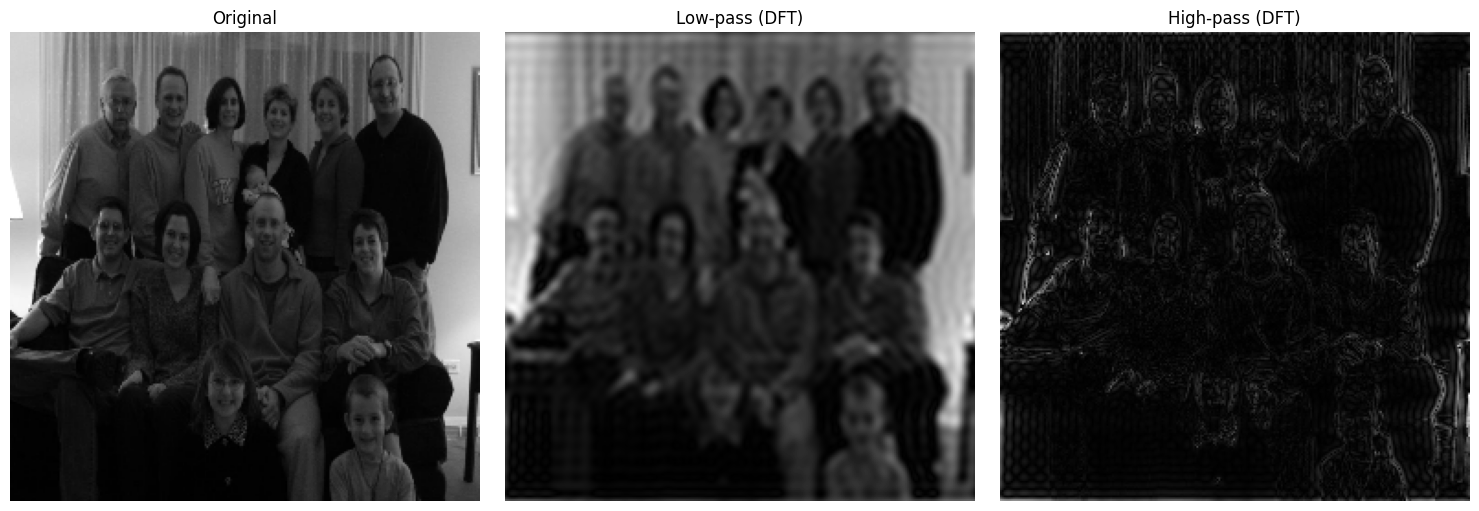

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dft_filter(img, filter_type='low', radius=20):
    img = np.float32(img)
    dft = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    if filter_type == 'low':
        mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 1
    elif filter_type == 'high':
        mask[:, :] = 1
        mask[crow - radius:crow + radius, ccol - radius:ccol + radius] = 0
    fshift = dft_shifted * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    return img_back


def dct_filter(img, keep_size=2, type='low'):
    img = np.float32(img)
    dct = cv2.dct(img)
    h, w = dct.shape
    mask = np.zeros_like(dct, dtype=np.uint8)
    if type == 'low':
        mask[:keep_size, :keep_size] = 1
    else:
        mask[:, :] = 1
        mask[:keep_size, :keep_size] = 0 
    dct_low_pass = dct * mask
    img_filtered = cv2.idct(dct_low_pass)

    return img_filtered


img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

low_pass_result_dft = dft_filter(img, filter_type='low', radius=30)
high_pass_result_dft = dft_filter(img, filter_type='high', radius=30)
low_pass_result_dct = dct_filter(img, keep_size=8 ,type='low')
high_pass_result_dct = dct_filter(img, keep_size=2 ,type='high')

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Low-pass (DFT)")
plt.imshow(low_pass_result_dft, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("High-pass (DFT)")
plt.imshow(high_pass_result_dft, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 255.5, 255.5, -0.5)

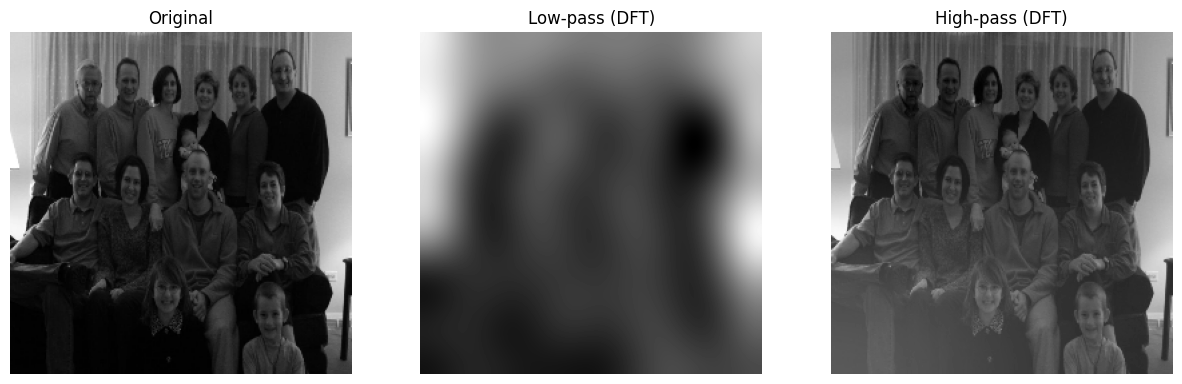

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Low-pass (DFT)")
plt.imshow(low_pass_result_dct, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("High-pass (DFT)")
plt.imshow(high_pass_result_dct, cmap='gray')
plt.axis('off')